# Programming Assignment 4 - Logistic Regression (170 points)

In [1]:
# Import Important Libraries
from sklearn.datasets import load_breast_cancer # taking included data set from Sklearn http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# TODO - Load the dataset - 5 points
cancer = load_breast_cancer()

In [3]:
# TODO - Print the shape of data (X) and target (Y) values - 5 points
print(cancer.target.shape)
print(cancer.data.shape)

(569,)
(569, 30)


# Data Pre-Processing
Scale before splitting the data into train and test- scale the data since we will be using gradient ascent

In [4]:
# TODO - Use preprocessing to scale the data and use train_test_split to split the data (70% train and 30% test) - 5 points
x_scale = preprocessing.scale(cancer.data)
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x_scale, y)

In [5]:
# TODO - Print the shape of x_train and y_train - 5 points
print(x_train.shape)
print(y_train.shape)

(426, 30)
(426,)


In [6]:
# Printing the names of all the features
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Implementing Logistic Regression Using Gradient Ascent

In [7]:
# TODO - Write the sigmoid function - 10 points
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [8]:
# VERIFY - Sigmoid of 0 should be equal to half
print(sigmoid(0))

0.5


In [9]:
# TODO - Append a column of ones to x_train - 10 points
# ones is a vector of shape n,1
ones = np.ones(x_train.shape[0]).reshape((x_train.shape[0], 1))
# Append a column of ones in the beginning of x_train an save in variable a.
a = np.hstack((ones, x_train))
print(a.shape)

(426, 31)


In [10]:
# TODO - Initialize Parameter Vector w: A vector of shape x_train.shape[1],1 - 5 points
w = np.zeros((a.shape[1], 1))
print(w.shape)

(31, 1)


In [11]:
# TODO - Write the hypothesis function - 10 points
def hypothesis(a , w):
    return sigmoid(a.dot(w))

In [12]:
# TODO - Compute y_hat using a and w - 5 points
yhat = hypothesis(a, w)

# Likelihood Function.
Write the code to calculate the log likelihood as discussed in the class.

In [13]:
# TODO - Write the log likelihood function - 15 points 
def likelihood(X_tr , Y_tr , w , n):
    yhat = hypothesis(X_tr,w)
    i = Y_tr.reshape((yhat.shape[0]),1)
    likelihood = np.sum(i*np.log(yhat)+(1-i)*np.log(1-yhat))
    return likelihood

In [14]:
# VERIFY - The value should be equal to -295.2806989185367.
print(likelihood(a,y_train,w,a.shape[0]))

-295.2806989185367


# Gradient Ascent

In [15]:
# TODO - Write the gradient ascent function - 25 points
def Gradient_Ascent(a, y, learning_rate, num_iters):
    n = a.shape[0] # Number of training examples.
    # TODO - Initialize w. Zeros vector of shape x_train.shape[1],1
    w = np.zeros((a.shape[1],1))
    # TODO - Reshape y to be a rank 2 matrix.
    y = y.reshape((y.shape[0],1))
    # TODO - Initiating list to store values of likelihood after few iterations.
    likelihood_values = []
    for i in range(num_iters):
        yhat = hypothesis(a,w)
        error = y-yhat
        gradient = a.T.dot(error)
        # Updating Parameters
        w = w + learning_rate / n * gradient
        if (i % 100) == 0:
            likelihood_values.append(likelihood(a,y,w,n))
        
    return w, likelihood_values

In [16]:
learning_rate = .5
num_iters = 100000
w, likelihood_values = Gradient_Ascent(a, y_train, learning_rate, num_iters)
print(w)

c:\users\jeff\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\jeff\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


[[ -1.57533819]
 [  1.8073845 ]
 [ -1.96871703]
 [  2.0362529 ]
 [ -1.66050427]
 [ -1.92156519]
 [ 11.45873371]
 [ -2.61784873]
 [ -8.85176189]
 [  2.68117285]
 [ -3.54235565]
 [-12.24024214]
 [  1.58576887]
 [  3.0146173 ]
 [ -4.45962994]
 [ -0.9558204 ]
 [ -5.59194634]
 [  7.64519841]
 [ -4.89456254]
 [  4.01350773]
 [  6.04989021]
 [ -4.52837178]
 [ -3.77010854]
 [  2.45252864]
 [ -6.69828194]
 [  0.55832165]
 [  3.89503074]
 [ -9.27740458]
 [ -4.15681529]
 [ -7.20067552]
 [  0.13993458]]


# Plotting Likelihood v/s Number of Iterations.

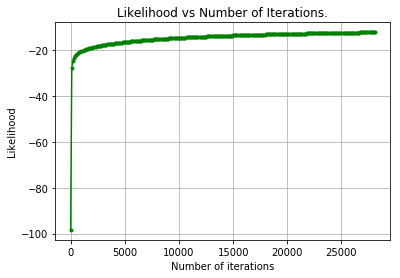

In [17]:
# Run this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,likelihood_values,'.-',color='green')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

You should see the likelihood increasing as number of Iterations increase.

In [18]:
# TODO - Write the function to compute predicted values using a and w - 10 points
def predict(a, w):
    yhat = hypothesis(a, w)
    return yhat

In [19]:
yhat = predict(a, w)

In [22]:
# TODO - Write the precision_recall function - 20 points
def precision_recall(yhat, y , threshold):
    # Write code to compute precision and recall
    # Before finding precision or recall, you have to convert yhat into a vector of zeros and ones using threshold.
    # Values in yhat > threshold should be equal to 1 and others should be 0.
    
    filtering = lambda x : 1 if x > threshold else 0
    processed = list(map(filtering, yhat))
    
    truePos = 0
    falseNeg = 0
    falsePos = 0
    
    for i in range(y.shape[0]):
        if y[i] == processed[i]:
            if y[i] == 1:
                truePos += 1
        else:
            if y[i] == 1:
                falseNeg += 1
            else:
                falsePos += 1
    
    precision = truePos / (truePos + falsePos)
    recall = truePos / (truePos + falseNeg)
    return precision,recall

In [23]:
precision, recall = precision_recall(yhat, y_train, 0.5)
print(precision)
print(recall)

0.9887640449438202
0.9924812030075187


In [24]:
# TODO - Write the f_score function - 10 points
def f_score(precision, recall):
    return 2*precision*recall/(precision+recall)

print(f_score(precision, recall))

0.9906191369606003


# Fitting Model using Sk Learn Library. 

In [25]:
# TODO - Create object of logistic regression model. Pass a large value of C (C = 1/lambda) to make lambda nearly 0. - 5 points
logreg = LogisticRegression(C=10000000000)

In [27]:
# TODO - Fit the model - 5 points
# Don't use matrix a. Instead, use x_train.
logreg.fit(x_train, y_train)

c:\users\jeff\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [28]:
# TODO - Find the predicted values on training set using logreg.predict - 5 points
yhat = logreg.predict(x_train)
# TODO - Find the accuracy achieved on training set using logreg.score - 5 points
acc = logreg.score(x_train, y_train)

print("Accuracy on training data = %f" % acc)

Accuracy on training data = 1.000000


In [29]:
# TODO - Print out all the coefficients - 5 points
w = logreg.coef_
intercept = logreg.intercept_
# VERIFY - Compare the parameters computed by logreg model and gradient ascent. They should be nearly same.
print(w)
print(intercept)

[[ 154.64766555  -11.09650666    4.20803702 -229.15918608  -48.872992
   108.76668878 -103.22226618  -52.6671195    36.06998577  -12.67034329
  -270.21590557   46.9519936    82.05314357   86.89102587   -4.88042363
  -152.56546871  123.48934953  -59.59365777   93.44579332   93.11807046
   107.55514352  -55.89776844   -8.61973925 -122.29226681   27.37319441
   156.10659924  -93.18165944  -58.15483456 -105.37186072  -50.60100315]]
[-32.15492276]


# Performance Metrics:


In [30]:
from sklearn.metrics import precision_recall_fscore_support
# TODO - Find Precision, recall and fscore using precision_recall_fscore_support nethod of sklearn - 5 points
prec , recal , fscore,_ = precision_recall_fscore_support(y_train, yhat)
print(prec)
print(recal)
print(fscore)

[1. 1.]
[1. 1.]
[1. 1.]


You can compare the values of precision, recall and fscore using the methods you wrote and using sklearn method.
To match the values of precision, recall and fscore using both methods, you will have to try different values of threshold in your method.